##### Machine Learning algorithms: K-NN, and GaussianNB, and the BDOShohamIML.csv database to evaluate classification performance of Flow Patterns

Let's get the imports taken care of

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV,  KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
#Load Dataset
df = pd.read_csv(r"BDOShohamIML.csv")

### A: Exploratory Data Analysis

In [3]:
#Check for NaN values# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5675 entries, 0 to 5674
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Vsl           5675 non-null   float64
 1   Vsg           5675 non-null   float64
 2   VisL          5675 non-null   float64
 3   VisG          5675 non-null   float64
 4   DenL          5675 non-null   int64  
 5   DenG          5675 non-null   float64
 6   ST            5675 non-null   float64
 7   Ang           5675 non-null   float64
 8   ID            5675 non-null   float64
 9   Flow Pattern  5675 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 443.5+ KB


As you can see above, we have no missing values

In [4]:
# Summarize the Dataset
#shape
print(df.shape)

(5675, 10)


In [5]:
# Statistical Summary

# descriptions
print(df.describe())

               Vsl          Vsg          VisL          VisG    DenL  \
count  5675.000000  5675.000000  5.675000e+03  5.675000e+03  5675.0   
mean      0.899747     6.222612  1.000000e-03  2.000000e-05  1000.0   
std       1.425159     8.699644  4.055273e-17  2.361736e-18     0.0   
min       0.001100     0.003720  1.000000e-03  2.000000e-05  1000.0   
25%       0.016000     0.162055  1.000000e-03  2.000000e-05  1000.0   
50%       0.250000     1.600000  1.000000e-03  2.000000e-05  1000.0   
75%       1.500000    10.000000  1.000000e-03  2.000000e-05  1000.0   
max      25.517000    42.956200  1.000000e-03  2.000000e-05  1000.0   

               DenG            ST          Ang           ID  
count  5.675000e+03  5.675000e+03  5675.000000  5675.000000  
mean   1.800000e+00  7.000000e-02     2.727401     0.038657  
std    4.108187e-14  5.690394e-15    46.202822     0.012985  
min    1.800000e+00  7.000000e-02   -90.000000     0.025000  
25%    1.800000e+00  7.000000e-02   -10.000000    

Lots of variation for Vsl(Superficial Liquid Velocity) and Vsg(Superficial Gas Velocity) and Ang (Inclination Angle)\

DenL(Liquid Density) and VisL (Liquid Velocity) have pretty much constant variance across the samples.

In [6]:
# class distribution
print(df.groupby('Flow Pattern').size())

Flow Pattern
A     1033
B      125
DB     594
I     2905
SS     140
SW     878
dtype: int64


Flow Pattern
A     1033
B      125
DB     594
I     2905
SS     140
SW     878
dtype: int64


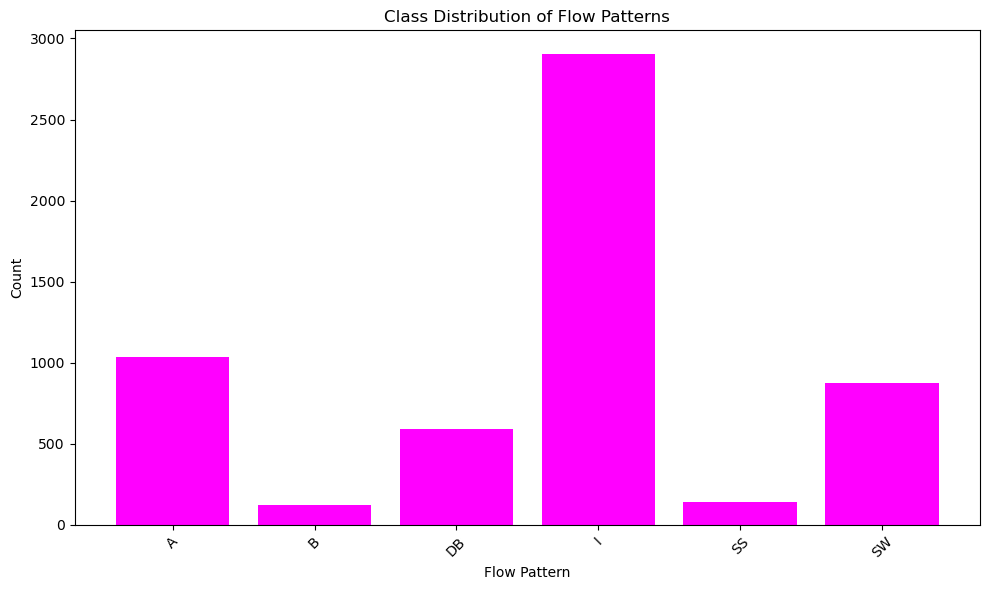

In [7]:
# class distribution
print(df.groupby('Flow Pattern').size())

flow_pattern_counts = df.groupby('Flow Pattern').size()

# Create a histogram
plt.figure(figsize=(10,6))
plt.bar(flow_pattern_counts.index, flow_pattern_counts.values, color='magenta')
plt.xlabel('Flow Pattern')
plt.ylabel('Count')
plt.title('Class Distribution of Flow Patterns')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Now lets take a look at how the features in our dataset are distributed

count    5675.000000
mean        0.899747
std         1.425159
min         0.001100
25%         0.016000
50%         0.250000
75%         1.500000
max        25.517000
Name: Vsl, dtype: float64


(0.0, 7.0)

<Figure size 900x800 with 0 Axes>

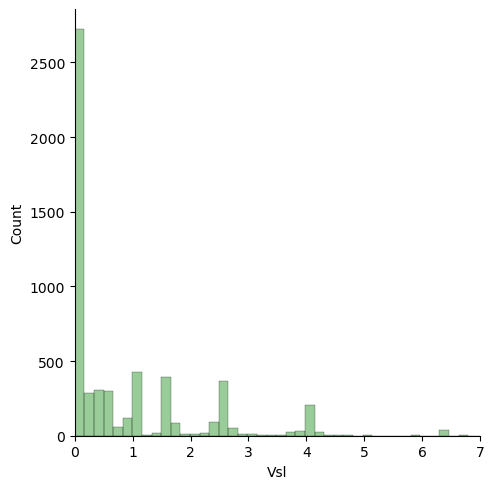

In [8]:
print(df['Vsl'].describe())
plt.figure(figsize=(9, 8))
sns.displot(df['Vsl'], color='g', alpha=0.4, kde=False)
plt.xlim(0, 7)

count    5675.000000
mean        6.222612
std         8.699644
min         0.003720
25%         0.162055
50%         1.600000
75%        10.000000
max        42.956200
Name: Vsg, dtype: float64


<Figure size 900x800 with 0 Axes>

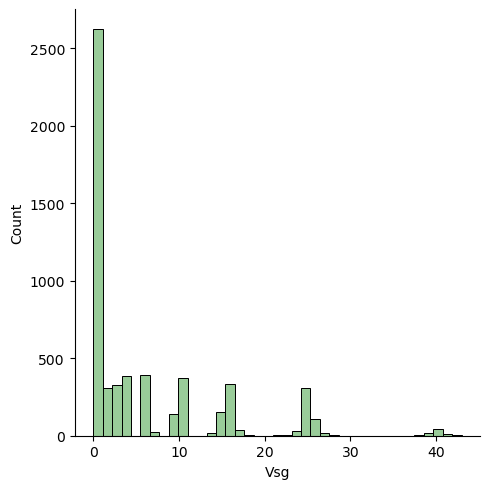

In [9]:
print(df['Vsg'].describe())
plt.figure(figsize=(9, 8))
sns.displot(df['Vsg'], color='g', alpha=0.4, kde=False)
#plt.xlim(0, 7)

count    5675.000000
mean        2.727401
std        46.202822
min       -90.000000
25%       -10.000000
50%         0.500000
75%        20.000000
max        90.000000
Name: Ang, dtype: float64


<Figure size 900x800 with 0 Axes>

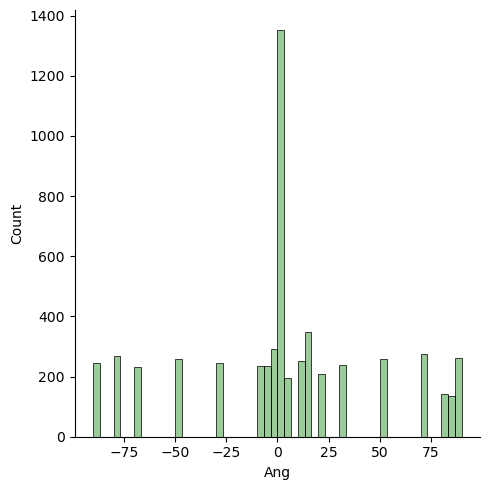

In [10]:
print(df['Ang'].describe())
plt.figure(figsize=(9, 8))
sns.displot(df['Ang'], color='g', alpha=0.4, kde=False)

count    5675.000000
mean        0.038657
std         0.012985
min         0.025000
25%         0.025000
50%         0.051000
75%         0.051000
max         0.051000
Name: ID, dtype: float64


<Figure size 900x800 with 0 Axes>

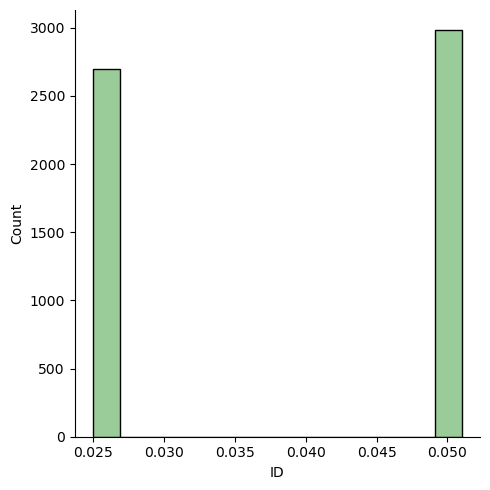

In [11]:
print(df['ID'].describe())
plt.figure(figsize=(9, 8))
sns.displot(df['ID'], color='g', alpha=0.4, kde=False)

Numerical data distribution
For this part lets look at the distribution of all of the features by ploting them

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

In [12]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [13]:
df_num = df.select_dtypes(include = ['float64'])

Now lets plot them all: Hist of numerical features 

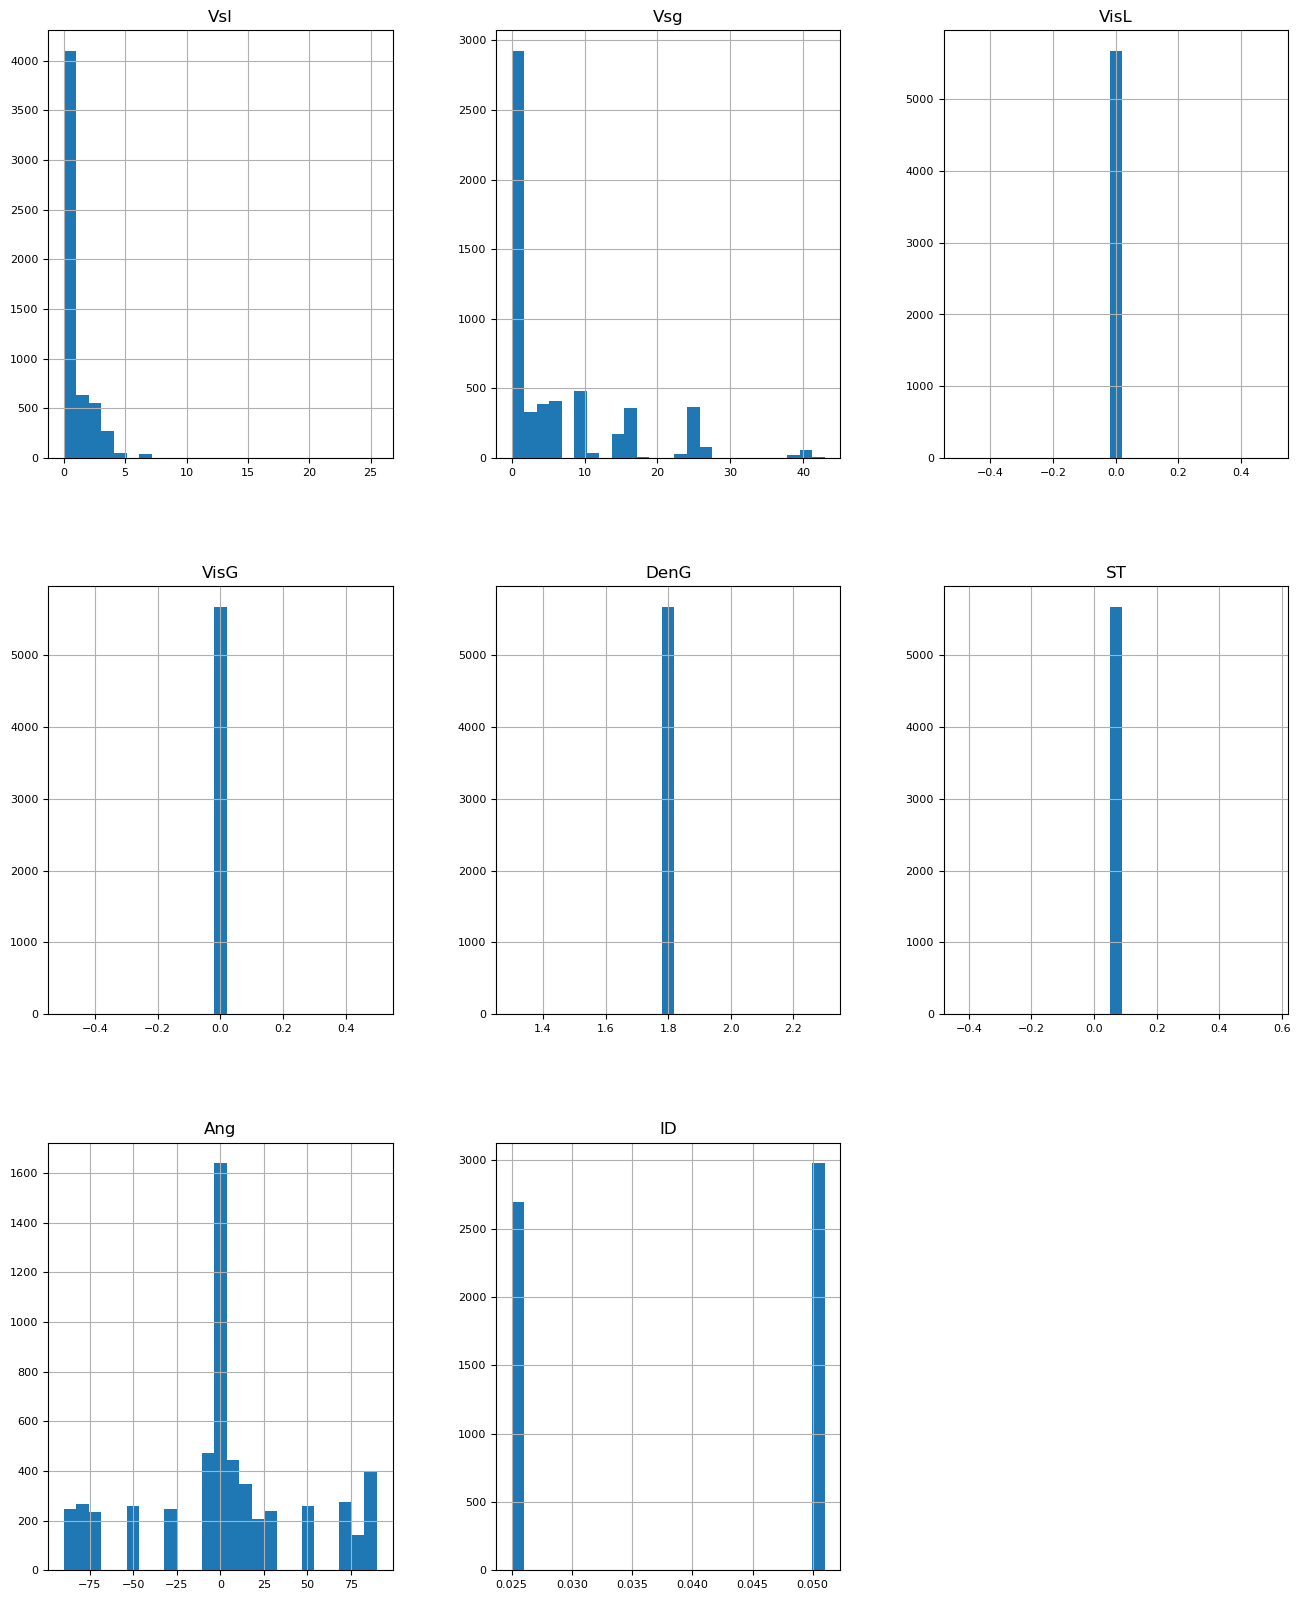

In [14]:
df_num.hist(figsize=(16, 20), bins=25, xlabelsize=8, ylabelsize=8);

<Figure size 1600x1200 with 0 Axes>

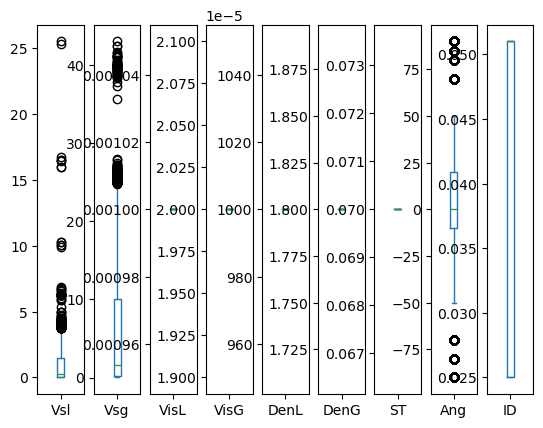

In [15]:
#box and whisker plots

#Syntax for Box and Whisker
#dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.figure(figsize=(16, 12))  # Adjust the figure size (width, height)
df.plot(kind='box', subplots=True, layout=(1,9), sharex=False, sharey=False)
plt.show()

SweetViz analyze()

In [16]:
import sweetviz as sv
analysis_report = sv.analyze(df)

# Show the report
analysis_report.show_html("analysis_report.html")


                                             |          | [  0%]   00:00 -> (? left)

Report analysis_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Note from: 

"Machine Learning applications to predict two-phase flow patterns 2021"

"Based on these results, only the features Ang, Vsg, Vsl, and ID are selected to train
models using the Shoham (1982) dataset since they represent most of its variance. On the
other hand, when using the 12 DB dataset, all features are kept."

### B: Paramater Optimization

#### Two models, K-Nearest Neighbors (K-NN) and Gaussian Naive Bayes (GaussianNB), to classify the "Flow Pattern." 

First step. Preparing the data for model training and perform parameter optimization.

My KKN and Gaussian Naive Bayes I am just going to do with 4 features,  'Vsl', 
'Vsg', 
'Ang', 
'ID'


PCA and encoding has already been preformed on this set of data, determining the 4 most important features.

In [17]:
# Separating features and target variable
X = df.drop(columns=['Flow Pattern', 'VisL', 'VisG', 'DenL', 'DenG', 'ST'])

y = df['Flow Pattern']

80/20 train_test_split in Sklearn added in random_state = 0 for reproducibility

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


I tried using StandardScaler() and MinMaxScaler(), they did not signficantly affect my results so i did not include them.

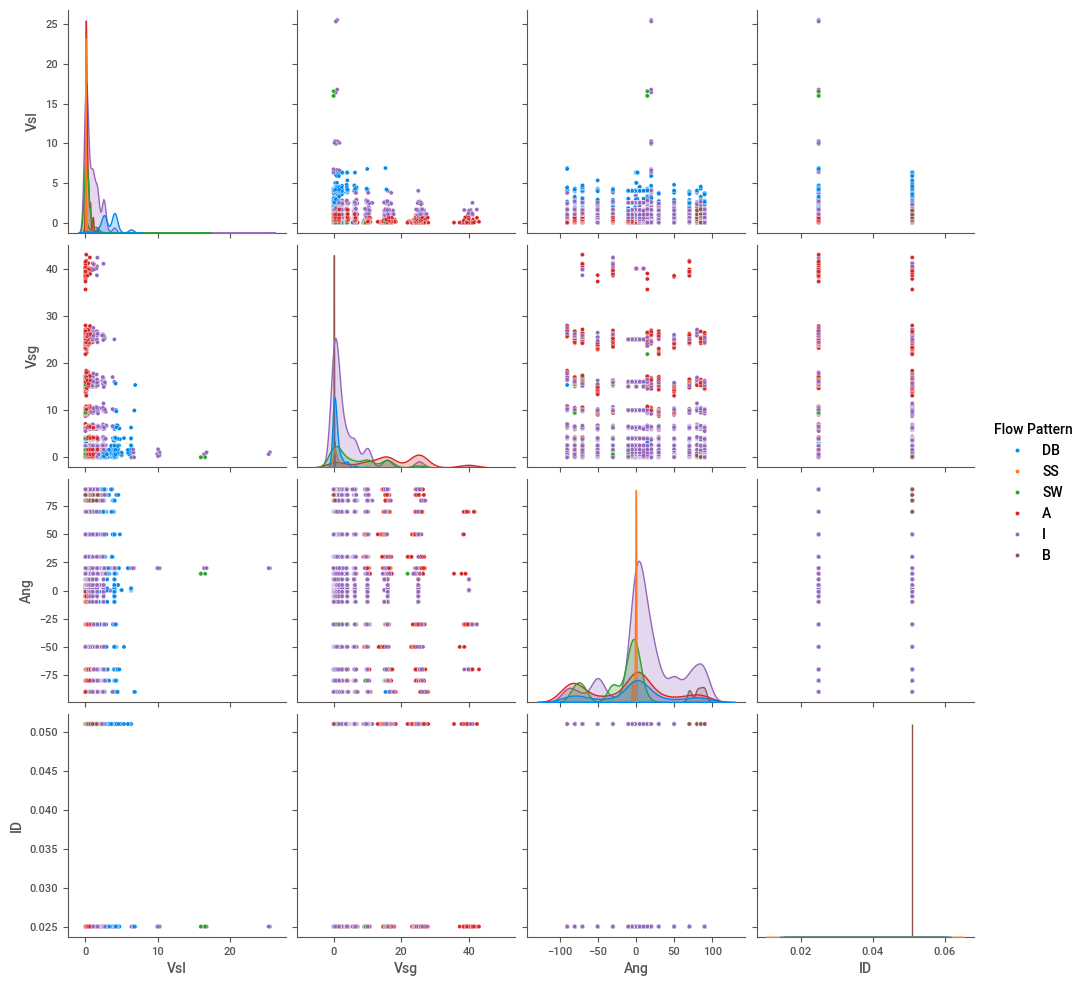

In [19]:
# Visualizing pairplots to see relationships between selected features
selected_features = ['Vsl', 'Vsg','Flow Pattern', 'Ang', 'ID']
sns.pairplot(df[selected_features], hue='Flow Pattern', diag_kind='kde')
plt.show()

The pairplot provides a visual summary of the relationships between selected numerical features ("Vsl," "Vsg"). While these plots allow us to observe trends and potential correlations between features, this does however include the target variable 'Flow Pattern'. My ID column does not appear to be properly show the distribution of InnerDiameter pipe dimmensions in our dataset.

Let's Look at how the values in our subset X_Train subset  correlate. Using the dataframe we created called correlation_matrix.

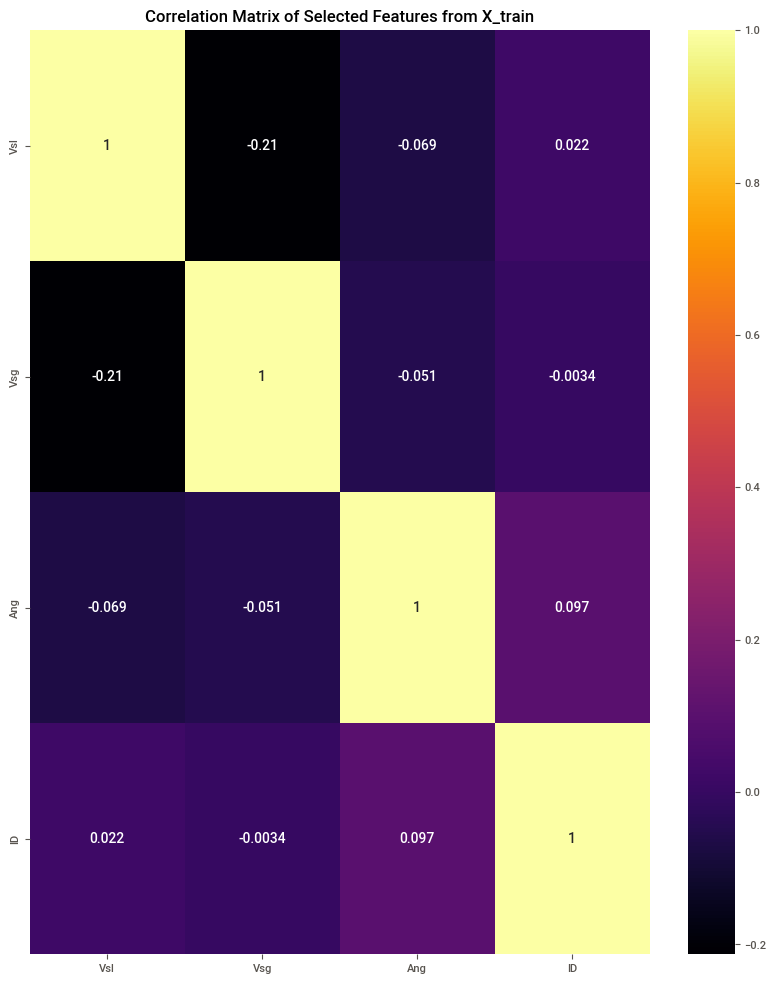

In [20]:
correlation_matrix = pd.DataFrame(X_train, columns=X.columns).corr()

plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Matrix of Selected Features from X_train')
plt.show()

KNN: Parameter Optimization with GridsearchCV
Warning: This may take awhile to run due to the sheer number of neighbors I am trying to run it is computationally expensive to run and will take up a lot of RAM. This is how you determine the best preforming hyperparameters.

In [21]:
param_grid_knn = {
    'n_neighbors': np.arange(2, 31),         #Best number of neighbors was 1, I tried from (2, 31).
    'weights': ['uniform', 'distance'],     #weights in journal was uniform
    'leaf_size': [2], #leaf size ranged from 1 to 100, best was 2, you could try (1, 100), etc.
    'p': [1],    # p =2 for Euclidean distance
    'metric' : ['minkowski', 'chebyshev', 'manhattan', 'euclidean']                   
}

# Perform GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=10, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Get the best parameters
best_params_knn = grid_search_knn.best_params_
best_knn = grid_search_knn.best_score_

print("Best KNN Hyperparameters: ", best_params_knn)
print("Best KNN Accuracy: ", best_knn)

Best KNN Hyperparameters:  {'leaf_size': 2, 'metric': 'minkowski', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best KNN Accuracy:  0.883920704845815


In [22]:
best_n_neighbors =1
best_weight = 'uniform'
best_leaf = 2
best_p = 1
best_metric = "minkowski"

knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors, 
                                weights=best_weight, 
                                leaf_size=best_leaf,
                                  p= best_p,
                                  metric = best_metric)
# Training new knn_best model
knn_best.fit(X_train, y_train)
#Test model
y_pred_best = knn_best.predict(X_test)
accuracy_knn_best = accuracy_score(y_test, y_pred_best)

print("Best KNN Hyperparams", accuracy_knn_best)


Best KNN Hyperparams 0.8872246696035242


With n_neighbors=1, the model memorizes the training data very closely. For any given point, it simply looks at its closest neighbor (which, on the training set, could often be the point itself), and directly assigns the label of that point. This will lead to generalization and overfitting.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
#Train the KNN classifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[179   0   0  11   0  11]
 [  0  25   0   8   0   0]
 [  0   0  95  30   0   2]
 [ 34   4  26 495   0   8]
 [  0   0   0   1  32   1]
 [ 13   0   2   6   2 150]]
              precision    recall  f1-score   support

           A       0.79      0.89      0.84       201
           B       0.86      0.76      0.81        33
          DB       0.77      0.75      0.76       127
           I       0.90      0.87      0.89       567
          SS       0.94      0.94      0.94        34
          SW       0.87      0.87      0.87       173

    accuracy                           0.86      1135
   macro avg       0.86      0.85      0.85      1135
weighted avg       0.86      0.86      0.86      1135



The results show that our KNN algorithm was able to classify all 1135 records in the test set with 0.86% accuracy. 

Comparing Error Rate with the K Value

In [24]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

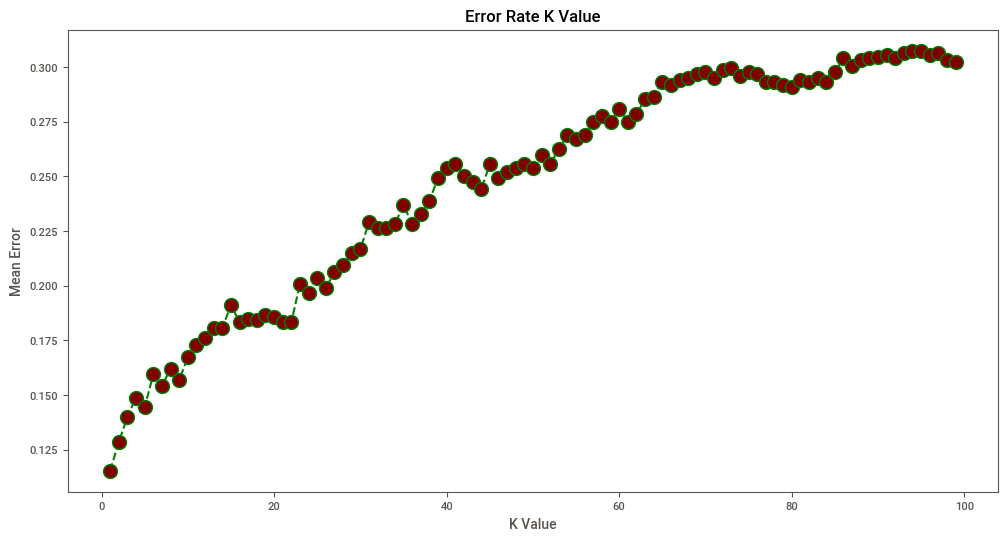

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='green', linestyle='dashed', marker='o',
         markerfacecolor='maroon', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

##### Gaussian Naive Bayes with hyperparameter tuning (var_smoothing)

var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean.

In the set below I am trying GNB with the var_smoothing which was the best from the journal.

In [26]:
gnb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)  # Tries 100 values from 1 to 1e-9
}
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit Data
grid_search.fit(X_train, y_train)

# Step 11: Get the best hyperparameters and model
best_params_gnb = grid_search.best_params_
best_model_gnb = grid_search.best_estimator_

print("Best Hyperparameters:", best_params_gnb)

# Step 12: Evaluate the model on the test set
y_pred = best_model_gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred)

print("Test Accuracy with Best Hyperparameters:", accuracy_gnb)

Best Hyperparameters: {'var_smoothing': 2.310129700083158e-08}
Test Accuracy with Best Hyperparameters: 0.6766519823788546


In [27]:
#Evaluate both models on the test set
y_pred_knn = knn.predict(X_test)
y_pred_gnb = grid_search.predict(X_test)

Classification report for GNB Model

In [28]:
gnb_report = classification_report(y_test, y_pred_gnb)

print("GaussianNB Classification Report:\n", gnb_report)

GaussianNB Classification Report:
               precision    recall  f1-score   support

           A       0.66      0.87      0.75       201
           B       0.78      0.97      0.86        33
          DB       0.78      0.71      0.74       127
           I       0.74      0.77      0.75       567
          SS       0.31      1.00      0.48        34
          SW       0.17      0.02      0.04       173

    accuracy                           0.68      1135
   macro avg       0.58      0.72      0.61      1135
weighted avg       0.63      0.68      0.64      1135



The results show are GNB algorithm was able to classify all 1135 records in the test set, with a 68% accuracy rate, this did not preform as well as our KNN algorithm.

In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_gnb), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_gnb), ": is the accuracy score")

[[174   0   0  26   0   1]
 [  0  32   0   1   0   0]
 [  0   0  90  36   1   0]
 [ 25   9  25 434  56  18]
 [  0   0   0   0  34   0]
 [ 63   0   1  88  17   4]] : is the confusion matrix
0.6766519823788546 : is the accuracy score


#### Evaluating Model Preformance with cross-validation

GB: 0.670925 (0.026527)
KNN: 0.848238 (0.021456)


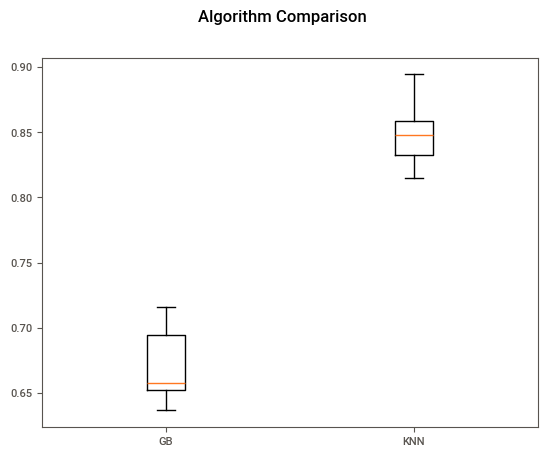

In [30]:
seed = 666
models = []
models.append(('GB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))

#Evaluate each model in turn using 10-fold cross-validation
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Each Model is evaluated using 10-fold cross-validation (kfold). cross_val_score() computes the mean accuracy for each fold and standard deviation, and the results are printed with the mean and standard deviation.

A boxplot is created to compare the accuracy of the two algorithms based on the 10-fold cross-validation results. 


### C: Discussion

By performing the EDA, we noticed key points: no missing values in the dataset, some features showed significant variance while others were constant, and particular features showed strong correlation. This info, along with the provided article, allowed us to select the best features for model training. The parameter optimization process did help enhance model accuracy. Though, the GridSearchCV showed a better fine-tuning for KNN, and var_smoothing didn’t prove to be a game changer for Gaussian. We moved on to evaluate KNN and Gaussian Naive Bayes model performance. In this regard, KNN outperformed Gaussian by a significant margin of 88.7% to 67.7% accuracy. The reports we ran display that KNN offered better precision across most of our target variables, while Gaussian had issues with some features and had lower overall accuracy. 